In [1]:
import numpy as np
import pandas as pd
import warnings; warnings.simplefilter('ignore')

In [2]:
# plotting
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [3]:
#sqqq and tqqq are taken as IBdata feed not for SPXS 
path = '/home/octo/Dropbox/IQ_data/'
spy=pd.read_csv(path + 'SPY.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)
sqqq= pd.read_csv(path + 'SQQQ.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)
tqqq=pd.read_csv(path + 'TQQQ.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)
spy=spy.tail(140000)
sqqq=sqqq.tail(140000)
tqqq=tqqq.tail(140000)

In [4]:
df=pd.DataFrame(data=spy.open)
df['close']=pd.DataFrame(data=spy.close)

    df['speed']=pd.DataFrame(data=(spy.open-spy.close.shift(-60))).shift(60)
    df['NL']=pd.rolling_sum(pd.DataFrame(data=(spy.open-spy.close.shift(-60))),15).shift(60)
    j=pd.rolling_sum(pd.DataFrame(data=(spy.open-spy.close.shift(-12))),5).shift(12)
    df['ju'] = np.where(j>0.25,1,0)
    df['jd'] = np.where(j<-0.25,-1,0)
    df['vol_u']=np.where(pd.DataFrame(data=spy.volume>pd.rolling_mean(spy.volume,60)),1,0)
    df['vol_d']=np.where(pd.DataFrame(data=spy.volume<pd.rolling_mean(spy.volume,60)),-1,0)
    P=(spy.high+spy.low+spy.close)/3
    df['R2']=P+(spy.high-spy.low)+0.02
    df['R2']=pd.rolling_mean(df_svm['R2'], window=60)
    df['S2']=P-(spy.high-spy.low)-0.02
    df['S2']=pd.rolling_mean(df_svm['S2'], window=60)
    df['vwap'] =pd.rolling_sum(spy.volume*P,60)/pd.rolling_sum(spy.volume,60)
    df['spread'] =df_svm['open'] -df_svm['vwap']
    df['R3']=df_svm.vwap+(pd.rolling_max(spy.high,360)-pd.rolling_min(spy.low,360))*0.12
    df['S3']=df_svm.vwap-(pd.rolling_max(spy.high,360)-pd.rolling_min(spy.low,360))*0.12

In [26]:
df['speed']=pd.rolling_sum(pd.DataFrame(data=(spy.open-spy.close.shift(-1))),60).shift(60)
df['j']=pd.rolling_sum(pd.DataFrame(data=(spy.open-spy.close.shift(-1))),300).shift(60)
df['ju'] = np.where(df.j>0.6,1,0)
df['jd'] = np.where(df.j<-0.6,-1,0)

In [85]:
df['R']=df.vwap+(pd.rolling_max(spy.high,360)-pd.rolling_min(spy.low,360))*0.15
df['S']=df.vwap-(pd.rolling_max(spy.high,360)-pd.rolling_min(spy.low,360))*0.15
df['L']=pd.rolling_min(spy.low+0.02,1000)
df['H']=pd.rolling_max(spy.high-0.02,1000)

In [86]:
#mean reversion
P=(spy.high+spy.low+spy.close)/3
df['vwap'] =pd.rolling_sum(spy.volume*P,60)/pd.rolling_sum(spy.volume,60)
df['spread'] =df.open -df['vwap']

In [107]:
min(df.spread.tail(8000))

-0.41085652961015739

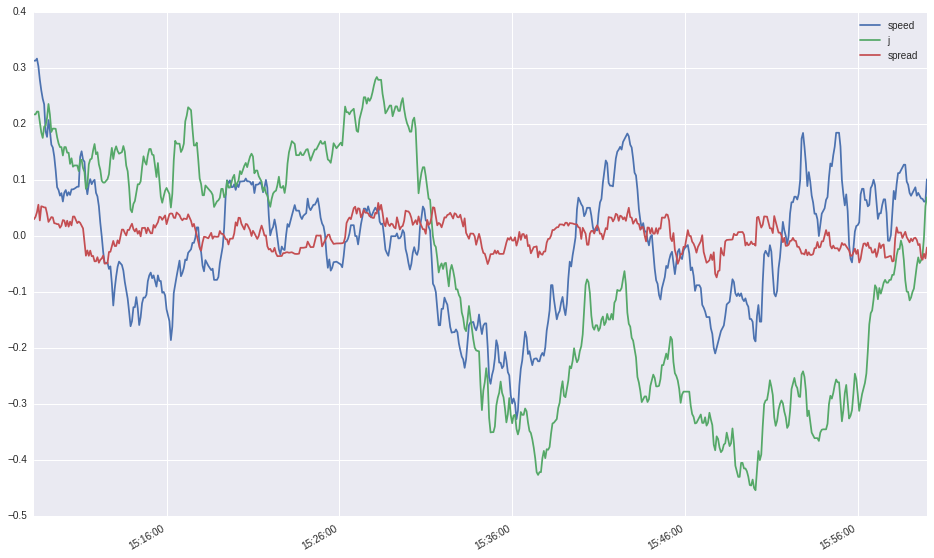

In [92]:
#spread is leading indicator
df[['speed','j','spread']].tail(600).plot(figsize=(16, 10))
plt.show()

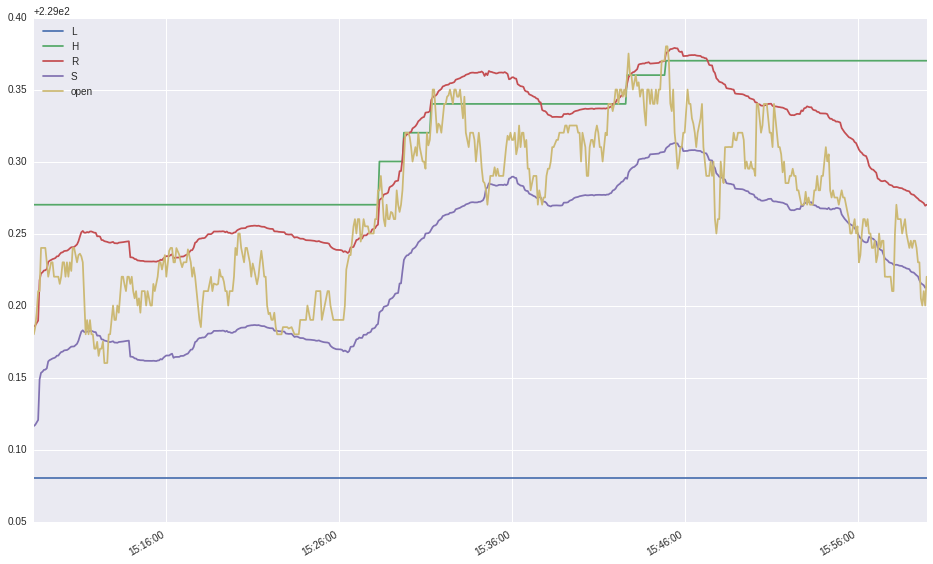

In [90]:
#Buy Sell points. [open>R and speed=-ve] or [open>H ==sell]
df[['L','H','R','S','open']].tail(600).plot(figsize=(16, 10))
plt.show()

In [71]:
#df[['spread']].tail(500).plot(figsize=(16, 10))
#plt.show()

In [70]:
#df[['open','R','S']].tail(500).plot(figsize=(16, 10))
#plt.show()

In [145]:
df['NL']=pd.DataFrame(data=abs(spy.open-spy.close.shift(-300)).shift(300))
df['NLqtop']=pd.rolling_quantile(df.NL,1000,.99)
df['NLqbot']=pd.rolling_quantile(df.NL,1000,.01)

In [139]:
df['speedQtop']=pd.rolling_quantile(df.speed,1000,.99)
df['speedQbot']=pd.rolling_quantile(df.speed,1000,.01)

In [140]:
df['spreadQtop']=pd.rolling_quantile(df.spread,1000,.9)
df['spreadQbot']=pd.rolling_quantile(df.spread,1000,.1)

### Reason of jump :: mean reversion 
    1. speed above or below quantile
    2. spread above or below quantile
    3. NL above or below quantile

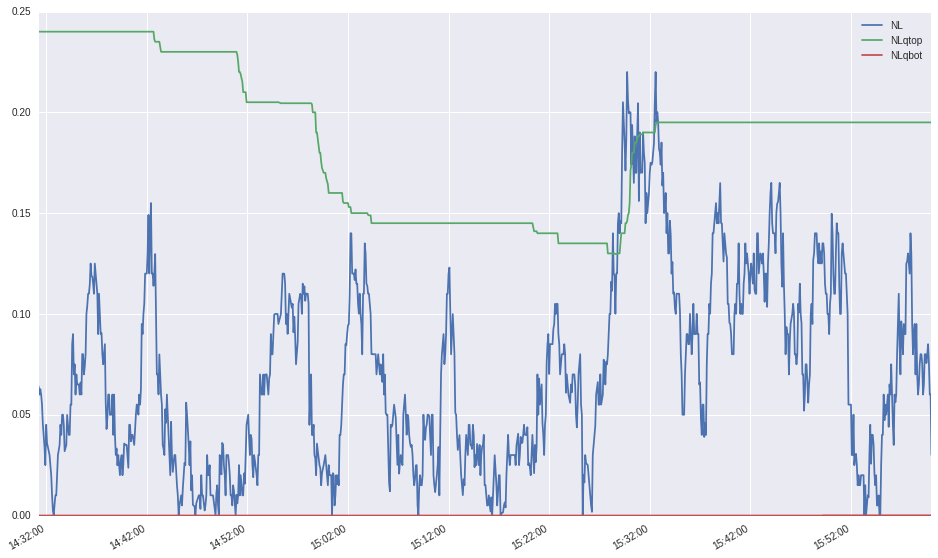

In [146]:
df[['NL','NLqtop','NLqbot']].tail(1000).plot(figsize=(16, 10))
plt.show()

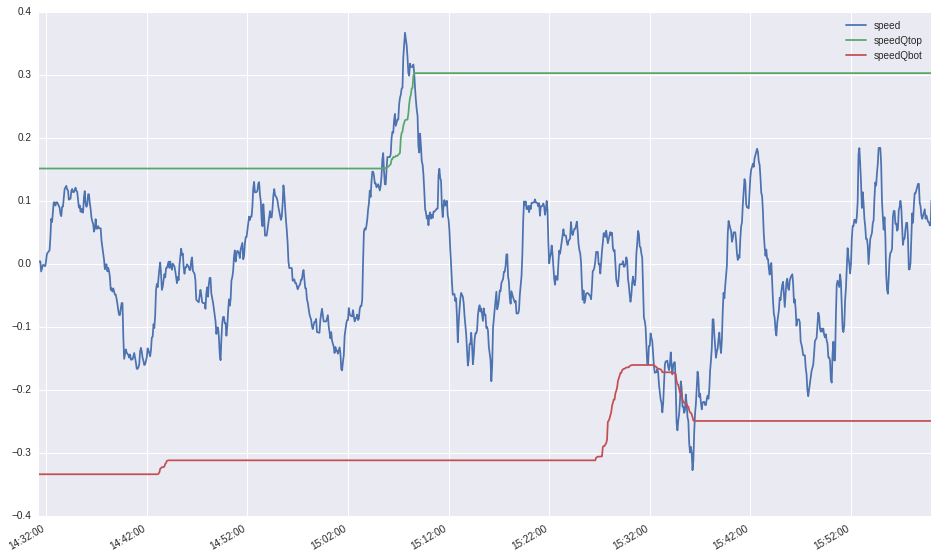

In [125]:
df[['speed','speedQtop','speedQbot']].tail(1000).plot(figsize=(16, 10))
plt.show()

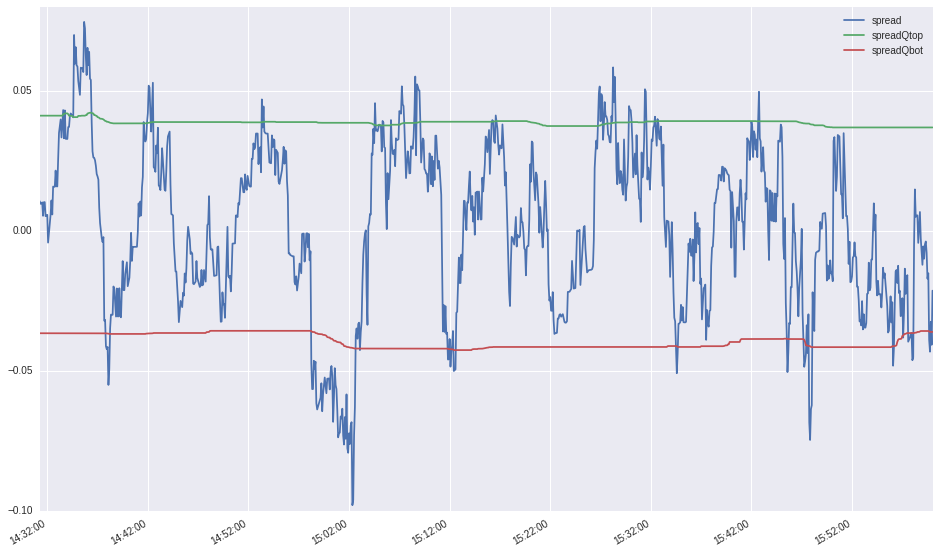

In [133]:
df[['spread','spreadQtop','spreadQbot']].tail(1000).plot(figsize=(16, 10))
plt.show()